### Бекетов Роман ИУ5-62Б Вариант 3 РК2

In [1]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from scipy import stats


filename = "HousingData.csv"

df = pd.read_csv(filename)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [2]:

missing_values = df.isna().sum()
print(missing_values)

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64


In [3]:
import pandas as pd


na_columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'LSTAT']


df[na_columns] = df[na_columns].fillna(df.mean())

df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.200000,4.0900,1,296,15.3,396.90,4.980000,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.900000,4.9671,2,242,17.8,396.90,9.140000,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.100000,4.9671,2,242,17.8,392.83,4.030000,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.800000,6.0622,3,222,18.7,394.63,2.940000,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.200000,6.0622,3,222,18.7,396.90,12.715432,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.100000,2.4786,1,273,21.0,391.99,12.715432,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.700000,2.2875,1,273,21.0,396.90,9.080000,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.000000,2.1675,1,273,21.0,396.90,5.640000,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.300000,2.3889,1,273,21.0,393.45,6.480000,22.0


In [4]:

corr_matrix_medv = df.corr()["MEDV"]


target_corr = np.abs(df.corrwith(df["MEDV"]))
print(target_corr.sort_values(ascending=False))

MEDV       1.000000
LSTAT      0.721975
RM         0.695360
PTRATIO    0.507787
INDUS      0.478657
TAX        0.468536
NOX        0.427321
RAD        0.381626
AGE        0.380223
CRIM       0.379695
ZN         0.365943
B          0.333461
DIS        0.249929
CHAS       0.179882
dtype: float64


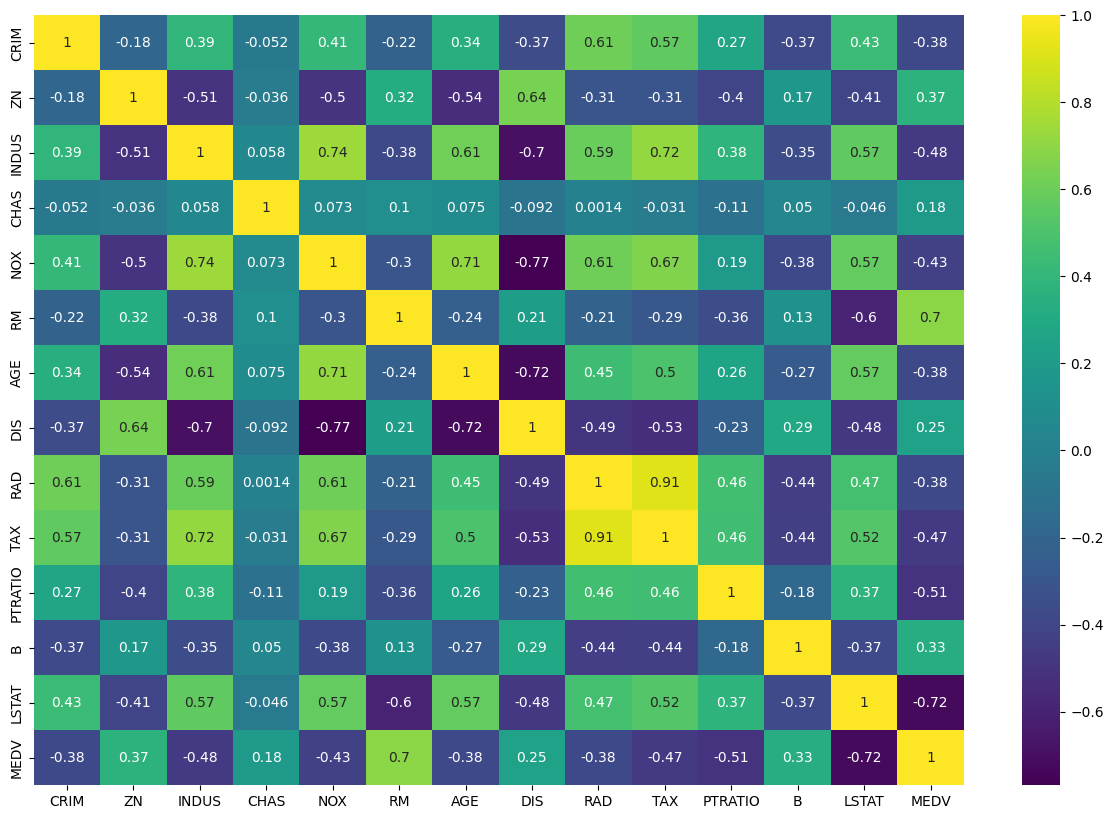

In [5]:

corr_matrix = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix,cmap="viridis", annot=True)
plt.show()

array([[<Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>,
        <Axes: xlabel='RM', ylabel='MEDV'>,
        <Axes: xlabel='PTRATIO', ylabel='MEDV'>,
        <Axes: xlabel='INDUS', ylabel='MEDV'>,
        <Axes: xlabel='TAX', ylabel='MEDV'>,
        <Axes: xlabel='NOX', ylabel='MEDV'>,
        <Axes: xlabel='B', ylabel='MEDV'>],
       [<Axes: xlabel='MEDV', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>,
        <Axes: xlabel='RM', ylabel='LSTAT'>,
        <Axes: xlabel='PTRATIO', ylabel='LSTAT'>,
        <Axes: xlabel='INDUS', ylabel='LSTAT'>,
        <Axes: xlabel='TAX', ylabel='LSTAT'>,
        <Axes: xlabel='NOX', ylabel='LSTAT'>,
        <Axes: xlabel='B', ylabel='LSTAT'>],
       [<Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>,
        <Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='PTRATIO', ylabel='RM'>,
        <Axes: xlabel='INDUS', ylabel='RM'>,
        <Axes: xlabel='TAX', ylabel

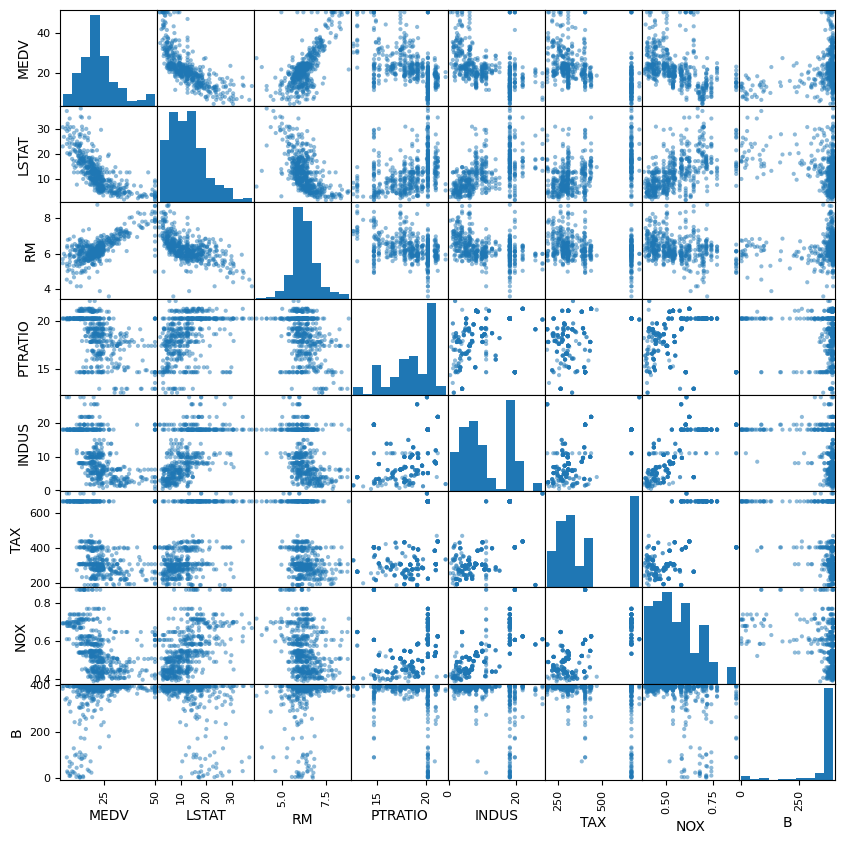

In [6]:

columns = ["MEDV", "LSTAT", "RM", "PTRATIO", "INDUS", "TAX", "NOX","B"]
scatter_matrix(df[columns], alpha=0.5, figsize=(10,10))

array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

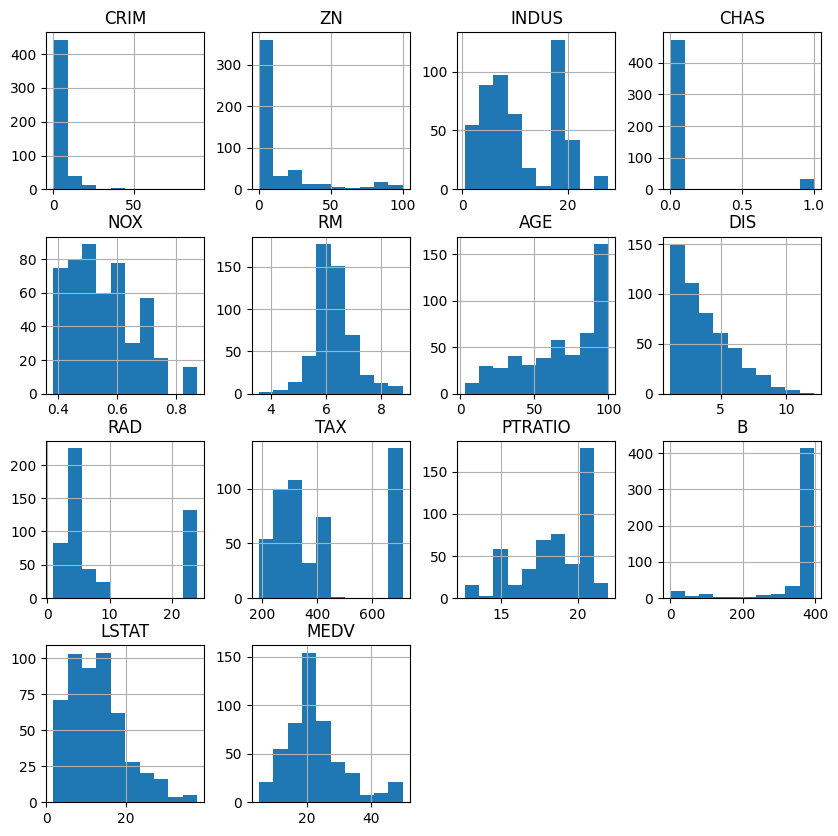

In [7]:
df.hist(figsize=(10,10))

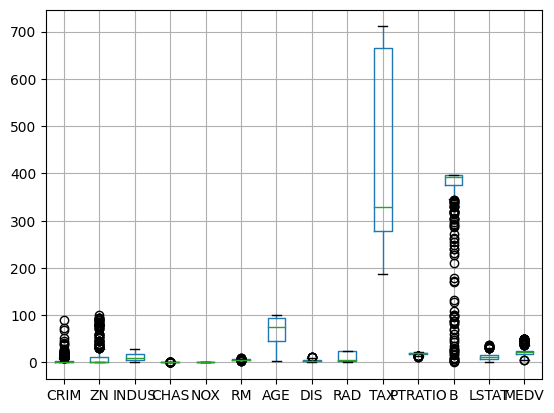

In [8]:
df.boxplot()
plt.show()

In [9]:

df.drop(["CHAS","DIS"], axis=1, inplace=True)
df

,CRIM,ZN,INDUS,NOX,RM,AGE,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.538,6.575,65.200000,1,296,15.3,396.90,4.980000,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.900000,2,242,17.8,396.90,9.140000,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.100000,2,242,17.8,392.83,4.030000,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.800000,3,222,18.7,394.63,2.940000,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.200000,3,222,18.7,396.90,12.715432,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.573,6.593,69.100000,1,273,21.0,391.99,12.715432,22.4
502,0.04527,0.0,11.93,0.573,6.120,76.700000,1,273,21.0,396.90,9.080000,20.6
503,0.06076,0.0,11.93,0.573,6.976,91.000000,1,273,21.0,396.90,5.640000,23.9
504,0.10959,0.0,11.93,0.573,6.794,89.300000,1,273,21.0,393.45,6.480000,22.0


In [10]:
z_threshold = 3

df_filtered = df.loc[(stats.zscore(df) < z_threshold).all(axis=1)]

In [11]:
df.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.611874,11.211934,11.083992,0.554695,6.284634,68.518519,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.545770,22.921051,6.699165,0.115878,0.702617,27.439466,8.707259,168.537116,2.164946,91.294864,7.012739,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.083235,0.000000,5.190000,0.449000,5.885500,45.925000,4.000000,279.000000,17.400000,375.377500,7.230000,17.025000
50%,0.290250,0.000000,9.900000,0.538000,6.208500,74.450000,5.000000,330.000000,19.050000,391.440000,11.995000,21.200000
75%,3.611874,11.211934,18.100000,0.624000,6.623500,93.575000,24.000000,666.000000,20.200000,396.225000,16.570000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


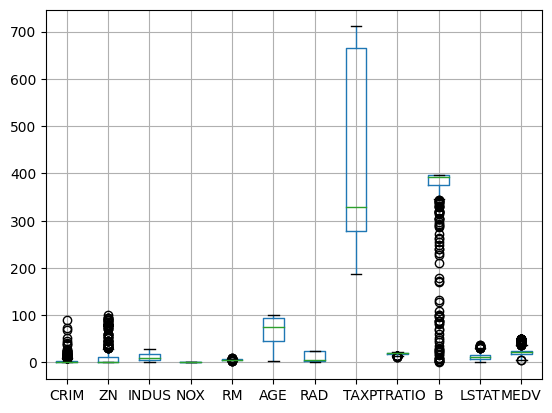

In [12]:
#after removing outliers
df.boxplot()
plt.show()

array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>],
       [<Axes: title={'center': 'B'}>, <Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>]], dtype=object)

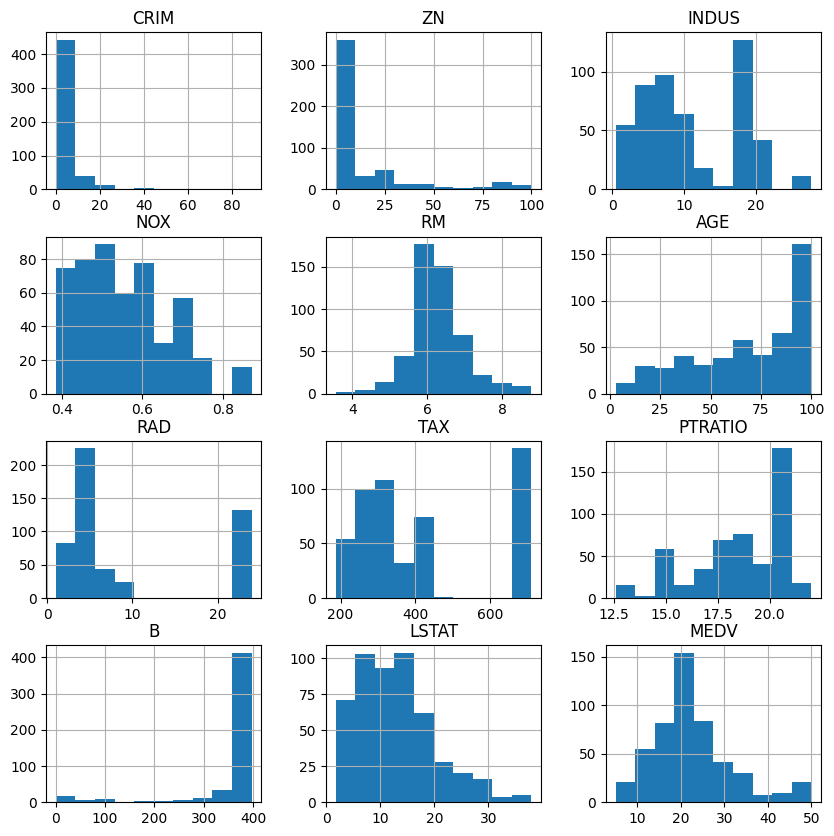

In [13]:

df.hist(figsize=(10,10))

In [14]:
X = df.drop(["MEDV"], axis=1)
y = df["MEDV"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [15]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = SVR()
model.fit(X_train_scaled, y_train)

In [17]:
#prediction
y_pred = model.predict(X_test_scaled)
print(y_pred)

[25.69117323 21.51473548 27.46364514 11.42647798 22.60504556 19.56599572
 20.01781172 21.92875502 16.11445511 17.979815    5.00323074 15.1903639
 17.92115009  4.63104325 38.41069244 33.88255916 22.23338886 37.43354497
 29.50436721 22.21842227 25.21566944 24.63131522 18.39816469 28.12635532
 22.68037949  5.94072    18.070583   19.92104695 35.6858979  20.35411987
 17.9852751  18.78474769 23.81926763 24.98858869 27.97315935 17.02198721
 11.5816075  19.82512086 16.81722989 15.20664726 27.72294686 21.55369674
 24.0904647  14.45980881 26.63625634 26.53526097 23.1250461  22.85469833
 11.80766452 23.22151249 20.3409109  16.40276015 23.97025654 36.11254501
 13.10959866 23.75841655 21.87581317 20.05049051 11.1236799  20.26474593
 22.4153387  22.28723937 32.95248836 29.42263477 16.96875883 30.76164445
 19.94189047 24.37443944 19.27862811 22.31262839 22.93643269 24.18665071
 29.21445077 30.04186351 25.90333672  4.91608434 37.94308161 24.42100881
 25.91955652 18.63260208 29.66694218 18.92272606 16.

In [18]:
#Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error is: {mse}")

Mean Squared Error is: 40.145576883770715


In [19]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root mean squared error: {rmse}")

Root mean squared error: 6.336053731130341


In [20]:
#R squared
r2 = r2_score(y_test, y_pred)
print(f"R2 Score: {r2}")

R2 Score: 0.5069833421066399


In [22]:
df

,CRIM,ZN,INDUS,NOX,RM,AGE,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.538,6.575,65.200000,1,296,15.3,396.90,4.980000,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.900000,2,242,17.8,396.90,9.140000,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.100000,2,242,17.8,392.83,4.030000,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.800000,3,222,18.7,394.63,2.940000,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.200000,3,222,18.7,396.90,12.715432,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.573,6.593,69.100000,1,273,21.0,391.99,12.715432,22.4
502,0.04527,0.0,11.93,0.573,6.120,76.700000,1,273,21.0,396.90,9.080000,20.6
503,0.06076,0.0,11.93,0.573,6.976,91.000000,1,273,21.0,396.90,5.640000,23.9
504,0.10959,0.0,11.93,0.573,6.794,89.300000,1,273,21.0,393.45,6.480000,22.0


In [23]:
custom_input = pd.DataFrame({
    'CRIM': [0.147],
    'ZN':[2],
    'INDUS': [8.50],
    'NOX': [0.53],
    'RM': [6.728],
    'AGE': [79.5],
    'RAD': [5],
    'TAX': [385],
    'PTRATIO':[20.9],
    'B':[395.0],
    'LSTAT':[9.42]
})

custom_input_scaled = scaler.transform(custom_input)

prediction = model.predict(custom_input_scaled)

print("Predicted value:", prediction[0])

Predicted value: 23.15947993650905


Я использовал различные метрики для оценки моделей регрессии, среднюю квадратичную ошибку (MSE), RMSE и коэффициент детерминации (R-квадрат).